In [28]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
data=pd.read_csv('Final_Model_data.csv')

In [30]:
data.head()

,DrugUse,MentalHealth,Age,EmploymentStatus,Sex,IncomeLevel,UrbanRural,EducationLevel
0,1,0,1,1,1,1,0,1
1,1,0,1,1,1,1,1,1
2,0,0,1,1,0,1,1,1
3,0,0,1,1,1,1,1,1
4,0,0,1,0,0,1,1,1


In [56]:
causal_graph_notears_threshold002 = """digraph {
DrugUse -> MentalHealth  [origin=learned, weight="0.32232902714064215"];
Age -> MentalHealth  [origin=learned, weight="0.3732297788075115"];
Age -> EmploymentStatus  [origin=learned, weight="0.2997028728323968"];
Age -> UrbanRural  [origin=learned, weight="0.6184971219685687"];
Age -> EducationLevel  [origin=learned, weight="0.350334265225816"];
Sex -> UrbanRural  [origin=learned, weight="0.2816387658266336"];
IncomeLevel -> EmploymentStatus  [origin=learned, weight="0.26726254829948587"];
UrbanRural -> EducationLevel  [origin=learned, weight="0.5252865706999018"];
EducationLevel -> EmploymentStatus  [origin=learned, weight="0.22031921136856628"];
EducationLevel -> IncomeLevel  [origin=learned, weight="0.5685713787866356"]
}"""

In [182]:
causal_graph_fci1 = """digraph {
DrugUse->IncomeLevel;
Age->EmploymentStatus;
Age->EducationLevel;
Age->IncomeLevel;
Age->MentalHealth;
Sex->EmploymentStatus;
Sex->DrugUse;
Sex->IncomeLevel;
Sex->EducationLevel;
UrbanRural->DrugUse;
UrbanRural->IncomeLevel;
UrbanRural->EducationLevel;
EmploymentStatus->MentalHealth;
EmploymentStatus->EducationLevel;
EmploymentStatus->IncomeLevel;
IncomeLevel->EducationLevel;
DrugUse->MentalHealth;
MentalHealth->IncomeLevel;
MentalHealth->EducationLevel;
}"""

In [198]:
causal_graph_notears = """digraph{
DrugUse;
MentalHealth;
Age;
EmploymentStatus;
Sex;
IncomeLevel;
UrbanRural;
EducationLevel;
DrugUse -> MentalHealth  [origin=learned, weight="0.3223161895355318"];
MentalHealth -> EducationLevel  [origin=learned, weight="0.19662852917041942"];
Age -> DrugUse  [origin=learned, weight="0.1707798540373034"];
Age -> MentalHealth  [origin=learned, weight="0.37382250466934147"];
Age -> EmploymentStatus  [origin=learned, weight="0.29935199319812944"];
Age -> EducationLevel  [origin=learned, weight="0.6744554452622066"];
Sex -> DrugUse  [origin=learned, weight="0.10666058510050247"];
Sex -> EducationLevel  [origin=learned, weight="0.31959120279983033"];
IncomeLevel -> EmploymentStatus  [origin=learned, weight="0.265652788154205"];
UrbanRural -> IncomeLevel  [origin=learned, weight="0.18853105626858785"];
EducationLevel -> EmploymentStatus  [origin=learned, weight="0.22482246214248297"];
EducationLevel -> IncomeLevel  [origin=learned, weight="0.5704509645014354"];
EducationLevel -> UrbanRural  [origin=learned, weight="0.7870140585730242"];
}"""

In [199]:
causal_graph_fci2 = """digraph {
DrugUse->IncomeLevel;
Age->EmploymentStatus;
Age->EducationLevel;
Age->IncomeLevel;
Age->MentalHealth;
Sex->EmploymentStatus;
Sex->DrugUse;
Sex->IncomeLevel;
Sex->EducationLevel;
UrbanRural->DrugUse;
UrbanRural->IncomeLevel;
UrbanRural->EducationLevel;
EmploymentStatus->MentalHealth;
EmploymentStatus->EducationLevel;
EmploymentStatus->IncomeLevel;
IncomeLevel->EducationLevel;
MentalHealth -> DrugUse;
MentalHealth->IncomeLevel;
MentalHealth->EducationLevel;
}"""

In [208]:
model=CausalModel(
        data = data,
        graph=causal_graph_fci2,
        treatment="MentalHealth",
        outcome="DrugUse")

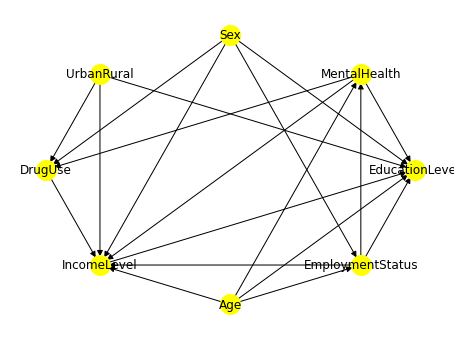

In [209]:
model.view_model()

In [210]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                       
───────────────(E[DrugUse|Sex])
d[MentalHealth]                
Estimand assumption 1, Unconfoundedness: If U→{MentalHealth} and U→DrugUse then P(DrugUse|MentalHealth,Sex,U) = P(DrugUse|MentalHealth,Sex)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                        -1⎤
 ⎢  d             ⎛  d                   ⎞  ⎥
E⎢──────(DrugUse)⋅⎜──────([MentalHealth])⎟  ⎥
 ⎣d[Age]          ⎝d[Age]                ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→DrugUse then ¬(U →→{Age})
Estimand assumption 2, Exclusion: If we remove {Age}→{MentalHealth}, then ¬({Age}→DrugUse)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [203]:
causal_estimate_att = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        target_units = "att")
print(causal_estimate_att)
print("Causal Estimate is " + str(causal_estimate_att.value))

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                          
──────────(E[MentalHealth|Age])
d[DrugUse]                     
Estimand assumption 1, Unconfoundedness: If U→{DrugUse} and U→MentalHealth then P(MentalHealth|DrugUse,Age,U) = P(MentalHealth|DrugUse,Age)

## Realized estimand
b: MentalHealth~DrugUse+Age
Target units: att

## Estimate
Mean value: 0.27413737716259806

Causal Estimate is 0.27413737716259806


In [195]:
refutation = model.refute_estimate(identified_estimand, 
                                   causal_estimate_att,
                                   method_name="placebo_treatment_refuter",
                                   placebo_type="permute", num_simulations=20)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0,

In [196]:
print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:0.21054064455342553
New effect:0.0008729807908775574
p value:0.42882667366321336



In [197]:
res_random=model.refute_estimate(identified_estimand,causal_estimate_att, method_name="random_common_cause", show_progress_bar=True)
print(res_random)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0,

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0,

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'att', 'effect_modifiers': ['UrbanRural']}
{'control_value': 0,